## logistics pilot test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
# from datetime import timedelta 
import folium
from math import cos, asin, sqrt, pi

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt

import osmnx as ox
ox.config(log_console=True, use_cache=True)
import random
import tabulate
import itertools
import timeit
import networkx as nx
import networkx.algorithms.approximation as nx_app

C:\Users\skchong\.conda\envs\dsi\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


Boeing, G. 2017. “OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks.” Computers, Environment and Urban Systems. 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004


In [5]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50

*import dataset*

### truck service and rates

In [6]:
trucksvc_df = pd.read_csv('./data/TruckingServiceAndRates.csv', encoding='latin-1')

In [8]:
trucksvc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10618 entries, 0 to 10617
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TruckingCompanyId         788 non-null    object 
 1   GroupId                   676 non-null    object 
 2   OriginCountryCode         788 non-null    object 
 3   OriginCountryName         788 non-null    object 
 4   OriginStateCityId         788 non-null    object 
 5   OriginStateCityName       788 non-null    object 
 6   IsOriginStateCity         788 non-null    object 
 7   DestinationCountryCode    788 non-null    object 
 8   DestinationCountryName    788 non-null    object 
 9   DestinationStateCityId    788 non-null    object 
 10  DestinationStateCityName  788 non-null    object 
 11  IsDestinationStateCity    788 non-null    object 
 12  ValidityFrom              788 non-null    object 
 13  ValidityTo                788 non-null    object 
 14  Curren

In [9]:
trucksvc_df['OriginCountryName'].value_counts()

Philippines    646
Malaysia       136
Singapore        6
Name: OriginCountryName, dtype: int64

In [10]:
trucksvc_df['OriginCountryCode'].value_counts()

3     646
2      96
MY     40
1       6
Name: OriginCountryCode, dtype: int64

In [11]:
trucksvc_df['DestinationCountryCode'].value_counts()

1/3/1900    646
1/2/1900     96
MY           40
1/1/1900      6
Name: DestinationCountryCode, dtype: int64

In [12]:
trucksvc_df['DestinationCountryName'].value_counts()

Philippines    646
Malaysia       136
Singapore        6
Name: DestinationCountryName, dtype: int64

### truck track and trace

In [13]:
trucktrace_df = pd.read_csv('./data/TruckingTrackAndTrace.csv')

In [15]:
trucktrace_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ReferenceNo        3000 non-null   object 
 1   Date               3000 non-null   object 
 2   EntityId           3000 non-null   object 
 3   Latitude           3000 non-null   float64
 4   LocationHistoryId  3000 non-null   object 
 5   Longitude          3000 non-null   float64
 6   SourceId           3000 non-null   object 
dtypes: float64(2), object(5)
memory usage: 164.2+ KB


In [16]:
trucktrace_df['date'] = [d.date() for d in pd.to_datetime(trucktrace_df['Date'])]
trucktrace_df['time'] = [d.time() for d in pd.to_datetime(trucktrace_df['Date'])]

In [18]:
trucktrace_gdf = gpd.GeoDataFrame(trucktrace_df, geometry=gpd.points_from_xy(trucktrace_df.Longitude, trucktrace_df.Latitude))


In [20]:
trucktrace_gdf['ReferenceNo'].unique()

array(['TF1-9032', 'TC2-4023', 'TD2-5734', 'TF1-9082', 'TD1-6093',
       'TG1-9580', 'TB1-2660', 'TD1-5379', 'TC1-332', 'TC1-4588',
       'TH1-80', 'TA1-1377', 'TF1-625', 'TB1-3106', 'TE2-7548',
       'TD1-5880', 'TD2-5824', 'TG1-790', 'TF1-8755', 'TA1-1386',
       'TA1-1878', 'TB1-2952', 'TC1-4355', 'TE2-7260', 'TD1-6031',
       'TC2-4474', 'TC2-3923', 'TC2-4816', 'TB1-3379', 'TD2-5597',
       'TE1-7314', 'TA2-2078', 'TD1-6018', 'TD1-402'], dtype=object)

In [22]:
trucktrace_gdf = trucktrace_gdf.set_geometry('geometry')

In [24]:
maps = folium.Map(location=[14.58, 120.98], zoom_start=10, tiles='CartoDB positron') # central manila

In [25]:
# remove empty points, or it will not plot in folium
trucktrace_gdf = trucktrace_gdf[~trucktrace_gdf['geometry'].is_empty]

In [26]:
trucktrace_gdf.shape

(3000, 10)

#### only selected truck reference

**TF1_9032**

In [29]:
TF1_9032_gdf = trucktrace_gdf[trucktrace_gdf['ReferenceNo']=='TF1-9032']

In [30]:
maps = folium.Map(location=[14.58, 120.98], zoom_start=10, tiles='CartoDB positron') # central manila

In [31]:
geos_TF1_9032 = [[point.xy[1][0],point.xy[0][0]] for point in TF1_9032_gdf['geometry']]

In [32]:
for _, r in TF1_9032_gdf.iterrows():
    lat = r['geometry'].y
    lon = r['geometry'].x
    folium.Marker(location=[lat, lon]).add_to(maps)
folium.PolyLine(geos_TF1_9032, color = 'red', weight = 5, opacity = 0.7).add_to(maps)
maps

**TC2-4474**

In [33]:
TC2_4474_gdf = trucktrace_gdf[trucktrace_gdf['ReferenceNo']=='TC2-4474']

In [35]:
maps = folium.Map(location=[14.58, 120.98], zoom_start=10, tiles='CartoDB positron') # central manila

In [36]:
geos_TC2_4474 = [[point.xy[1][0],point.xy[0][0]] for point in TC2_4474_gdf['geometry']]

In [37]:
for _, r in TC2_4474_gdf.iterrows():
    lat = r['geometry'].y
    lon = r['geometry'].x
    folium.Marker(location=[lat, lon]).add_to(maps)
folium.PolyLine(geos_TC2_4474, color = 'purple', weight = 8, opacity = 0.7).add_to(maps)
maps

**use osmnx**
<br> OpenStreetMap nodes include all intersections, includikng all the points along a single street segment where the street curves, but they are not true intersections (ie., not nodes in the graph theory sense). osmnx removes them algorithmically and consolidate the set of edges between “true” network nodes into a single edge.

In [41]:
from math import cos, asin, sqrt, pi

def distance(lat1, lon1, lat2, lon2):  #in km
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) #2*R*asin...

In [43]:
G = ox.graph_from_point((14.58, 120.98), dist=10000, network_type='drive')  # point of central manila, dist in m
# ox.plot_graph(G);

**TF1-9032**

In [47]:
origin = (geos_TF1_9032[0][0], geos_TF1_9032[0][1])
destination = (geos_TF1_9032[-1][0], geos_TF1_9032[-1][1])

origin_node = ox.distance.nearest_nodes(G, origin[1], origin[0] )
destination_node = ox.distance.nearest_nodes(G, destination[1], destination[0])

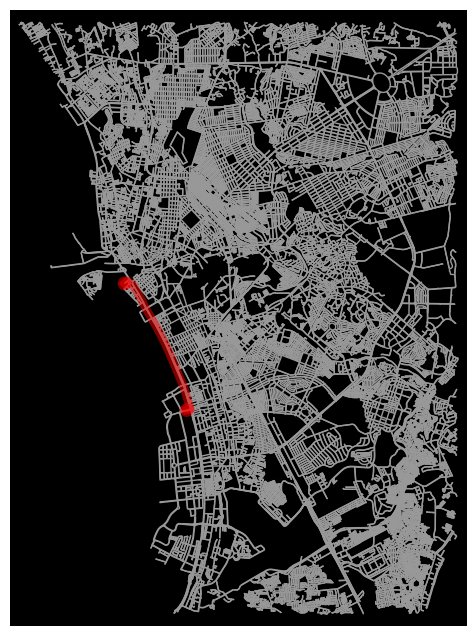

In [48]:
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')


In [49]:
ox.plot_route_folium(G, route, weight=10)

**TF1-9082**

In [50]:
G = ox.graph_from_point((14.58, 120.98), dist=100000, network_type='drive')  # point of central manila

**TD2-5734**

In [53]:
TD2_5734_gdf = trucktrace_gdf[trucktrace_gdf['ReferenceNo']=='TD2-5734']

geos_TD2_5734 = [[point.xy[1][0],point.xy[0][0]] for point in TD2_5734_gdf['geometry']]

origin = (geos_TD2_5734[0][0], geos_TD2_5734[0][1])
destination = (geos_TD2_5734[-1][0], geos_TD2_5734[-1][1])

origin_node = ox.distance.nearest_nodes(G, origin[1], origin[0])
destination_node = ox.distance.nearest_nodes(G, destination[1], destination[0])


In [54]:
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
ox.plot_route_folium(G, route, weight=10)


**all reference nr**

In [58]:
for ref in trucktrace_gdf['ReferenceNo'].unique():
    if ref not in ['TF1-9082','TF1-8755','TC2-4023']:
        # create gdf
        temp = trucktrace_gdf[trucktrace_gdf['ReferenceNo']==ref]

        # create geos points from geometry
        geos_points = [[point.xy[1][0],point.xy[0][0]] for point in temp['geometry']]

        # create nodes
        origin = (geos_points[0][0], geos_points[0][1])
        destination = (geos_points[-1][0], geos_points[-1][1])
 
        origin_node = ox.distance.nearest_nodes(G, origin[1], origin[0])
        destination_node = ox.distance.nearest_nodes(G, destination[1], destination[0])

        route = nx.shortest_path(G, origin_node, destination_node, weight='distance')
        print(ref,len(route))
        if len(route)>1: 
            ox.plot_route_folium(G, route, weight=10)
            plt.show()

TF1-9032 29
TD2-5734 58
TD1-6093 1
TG1-9580 87
TB1-2660 1
TD1-5379 1
TC1-332 92
TC1-4588 1
TH1-80 1
TA1-1377 25
TF1-625 95
TB1-3106 1
TE2-7548 232
TD1-5880 3
TD2-5824 106
TG1-790 1
TA1-1386 1
TA1-1878 1
TB1-2952 110
TC1-4355 112
TE2-7260 54
TD1-6031 2
TC2-4474 39
TC2-3923 25
TC2-4816 237
TB1-3379 45
TD2-5597 1
TE1-7314 36
TA2-2078 1
TD1-6018 1
TD1-402 87


### multiple routes

TF1-9032
<br> TD2-5734
<br> TG1-9580 

In [59]:
TF1_9032_gdf = trucktrace_gdf[trucktrace_gdf['ReferenceNo']=='TF1-9032']
geos_TF1_9032 = [[point.xy[1][0],point.xy[0][0]] for point in TF1_9032_gdf['geometry']]
origin1 = (geos_TF1_9032[0][0], geos_TF1_9032[0][1])
destination1 = (geos_TF1_9032[-1][0], geos_TF1_9032[-1][1])

origin_node1 = ox.distance.nearest_nodes(G, origin1[1], origin1[0])
destination_node1 = ox.distance.nearest_nodes(G, destination1[1], destination1[0])

In [60]:
TD2_5734_gdf = trucktrace_gdf[trucktrace_gdf['ReferenceNo']=='TD2-5734']
geos_TD2_5734 = [[point.xy[1][0],point.xy[0][0]] for point in TD2_5734_gdf['geometry']]
origin2 = (geos_TD2_5734[0][0], geos_TD2_5734[0][1])
destination2 = (geos_TD2_5734[-1][0], geos_TD2_5734[-1][1])

origin_node2 = ox.distance.nearest_nodes(G, origin2[1], origin2[0])
destination_node2 = ox.distance.nearest_nodes(G, destination2[1], destination2[0])

In [61]:
TG1_9580_gdf = trucktrace_gdf[trucktrace_gdf['ReferenceNo']=='TG1-9580']
geos_TG1_9580 = [[point.xy[1][0],point.xy[0][0]] for point in TG1_9580_gdf['geometry']]
origin3 = (geos_TG1_9580[0][0], geos_TG1_9580[0][1])
destination3 = (geos_TG1_9580[-1][0], geos_TG1_9580[-1][1])

origin_node3 = ox.distance.nearest_nodes(G, origin3[1], origin3[0])
destination_node3 = ox.distance.nearest_nodes(G, destination3[1], destination3[0])

In [62]:
# calculate shortest paths for the 3 routes
route1 = nx.shortest_path(G, origin_node1, destination_node1, weight='distance')
route2 = nx.shortest_path(G, origin_node2, destination_node2, weight='distance')
route3 = nx.shortest_path(G, origin_node3, destination_node3, weight='distance')


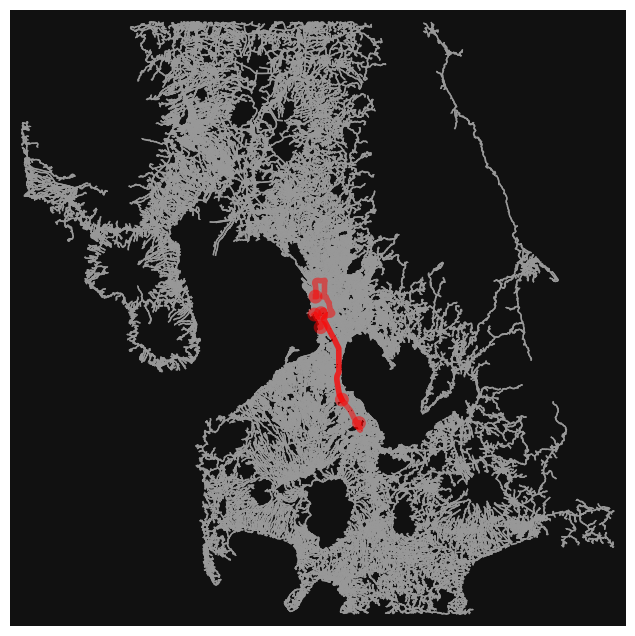

In [63]:
# only plots 'red' regardless of route_color 
rc = ['y', 'r', 'c']

# plot the routes
fig, ax = ox.plot_graph_routes(G, [route1, route2, route3], route_color=rc, node_size=0)

In [64]:
route_map = ox.plot_route_folium(G, route1, route_color='#ff0000', opacity=0.8)
route_map = ox.plot_route_folium(G, route2, route_map=route_map, route_color='#0018a8', opacity=0.8)
route_map = ox.plot_route_folium(G, route3, route_map=route_map, route_color='#458b74', opacity=0.8)
route_map.save('./data/route.html')

### multiple routes optimisation

In [65]:
tsp = nx.approximation.traveling_salesman_problem

In [68]:
trucktrace_gdf['ReferenceNo'].unique()

array(['TF1-9032', 'TC2-4023', 'TD2-5734', 'TF1-9082', 'TD1-6093',
       'TG1-9580', 'TB1-2660', 'TD1-5379', 'TC1-332', 'TC1-4588',
       'TH1-80', 'TA1-1377', 'TF1-625', 'TB1-3106', 'TE2-7548',
       'TD1-5880', 'TD2-5824', 'TG1-790', 'TF1-8755', 'TA1-1386',
       'TA1-1878', 'TB1-2952', 'TC1-4355', 'TE2-7260', 'TD1-6031',
       'TC2-4474', 'TC2-3923', 'TC2-4816', 'TB1-3379', 'TD2-5597',
       'TE1-7314', 'TA2-2078', 'TD1-6018', 'TD1-402'], dtype=object)

problematic
<br> 'TD1-6093'

In [372]:
RefList = ['TF1-9032', 'TC2-4023', 'TD2-5734', 'TF1-9082','TB1-2660' ,'TG1-9580','TC1-4588','TD1-5379','TC1-332','TG1-9580', 'TB1-2660', 'TD1-5379', 'TC1-332', 'TC1-4588','TH1-80', 'TA1-1377', 'TF1-625', 'TB1-3106', 'TE2-7548','TD1-5880', 'TD2-5824', 'TG1-790', 'TF1-8755', 'TA1-1386','TA1-1878', 'TB1-2952', 'TC1-4355', 'TE2-7260', 'TD1-6031','TC2-4474', 'TC2-3923', 'TC2-4816', 'TB1-3379', 'TD2-5597']

In [374]:
G1 = nx.Graph()
for nr, ref in enumerate(RefList):
    # create gdf
    temp = trucktrace_gdf[trucktrace_gdf['ReferenceNo']==ref]

    # create geos points from geometry
    geos_points = [[point.xy[1][0],point.xy[0][0]] for point in temp['geometry']]

    # first node is start and end
    # nodes are placed according to destinations, so does not have to be in order
    # order is decided by tsp
    if nr==0:
        G1.add_node(0, pos=(geos_points[0][0], geos_points[0][1]))
        G1.add_node(1, pos=(geos_points[-1][0], geos_points[-1][1]))
    elif nr>=1:
        G1.add_node(nr+1, pos=(geos_points[-1][0], geos_points[-1][1]))
pos=nx.get_node_attributes(G1,'pos')


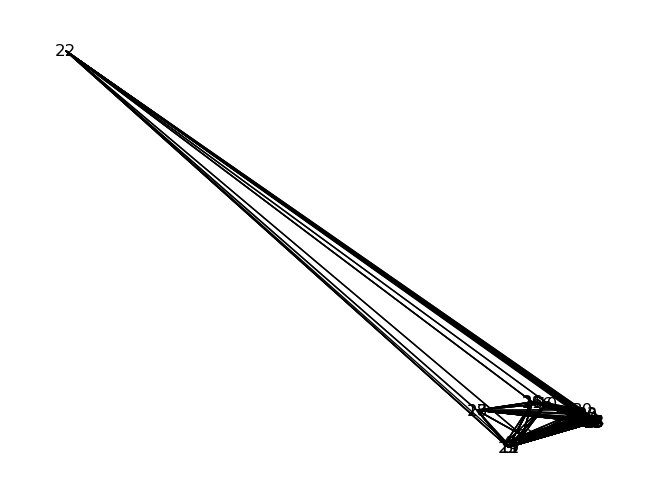

In [376]:
# add edges between nodes
# default weight = 1
for i in G1.nodes:
    for j in G1.nodes:
        if i!=j:
            G1.add_edge(i, j)
nx.draw(G1, pos, with_labels=True, node_size=0)

In [377]:
tsp_route = tsp(G1, nodes=G1.nodes, cycle=True) 
tsp_route 

[0,
 18,
 17,
 19,
 16,
 20,
 15,
 21,
 14,
 22,
 13,
 23,
 12,
 24,
 11,
 25,
 10,
 26,
 9,
 27,
 8,
 28,
 7,
 29,
 6,
 30,
 5,
 31,
 4,
 32,
 3,
 33,
 2,
 34,
 1,
 0]

In [378]:
opti_route = []
for i in range((len(tsp_route)-1)):
    origin = list(pos.values())[tsp_route[i]]
    destination = list(pos.values())[tsp_route[i+1]]

    origin_node = ox.distance.nearest_nodes(G, origin[1], origin[0])
    destination_node = ox.distance.nearest_nodes(G, destination[1], destination[0])

    try:
        route = nx.shortest_path(G, origin_node, destination_node, weight='distance')
    except (nx.NetworkXNoPath, nx.exception.NetworkXError) as e:
        print(i, e)

        continue         

    if i!=(len(pos)-1):
        route.pop() # remove last element of route = first element of next route
    opti_route.append(route)

all_route = list(itertools.chain(*opti_route))

In [379]:
opti_map = ox.plot_route_folium(G, all_route, route_color='#458b74', opacity=0.8)
opti_map.save('./data/opti_route.html')